In [1]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Нормалізація
x_train = x_train / 255.0
x_test = x_test / 255.0

# Перетворення до формату для CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 2s 55us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 88s 3us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:

model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [5]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)


Epoch 1/15
844/844 - 79s - 94ms/step - accuracy: 0.8010 - loss: 0.5732 - val_accuracy: 0.8757 - val_loss: 0.3418
Epoch 2/15
844/844 - 71s - 84ms/step - accuracy: 0.8616 - loss: 0.3824 - val_accuracy: 0.8922 - val_loss: 0.2946
Epoch 3/15
844/844 - 71s - 84ms/step - accuracy: 0.8762 - loss: 0.3443 - val_accuracy: 0.8768 - val_loss: 0.3367
Epoch 4/15
844/844 - 85s - 101ms/step - accuracy: 0.8836 - loss: 0.3219 - val_accuracy: 0.8907 - val_loss: 0.2908
Epoch 5/15
844/844 - 71s - 84ms/step - accuracy: 0.8897 - loss: 0.3006 - val_accuracy: 0.8953 - val_loss: 0.2758
Epoch 6/15
844/844 - 83s - 98ms/step - accuracy: 0.8936 - loss: 0.2903 - val_accuracy: 0.8933 - val_loss: 0.2871
Epoch 7/15
844/844 - 83s - 99ms/step - accuracy: 0.8972 - loss: 0.2797 - val_accuracy: 0.9045 - val_loss: 0.2492
Epoch 8/15
844/844 - 83s - 98ms/step - accuracy: 0.9016 - loss: 0.2699 - val_accuracy: 0.9068 - val_loss: 0.2426
Epoch 9/15
844/844 - 83s - 98ms/step - accuracy: 0.9043 - loss: 0.2636 - val_accuracy: 0.9120 -

In [6]:

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Точність на тестових даних: {test_acc * 100:.2f}%")


313/313 - 3s - 10ms/step - accuracy: 0.9001 - loss: 0.2682

✅ Точність на тестових даних: 90.01%


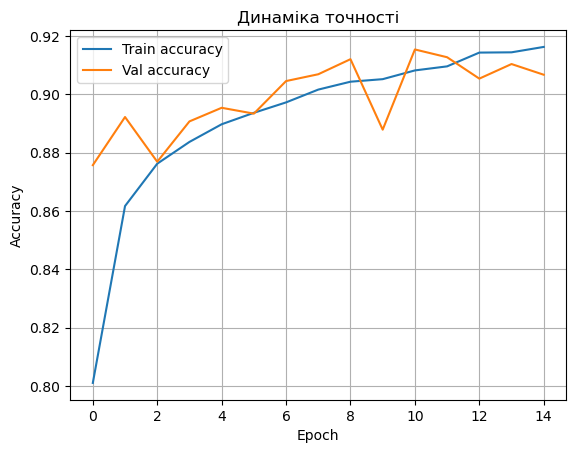

In [9]:

plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Динаміка точності')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


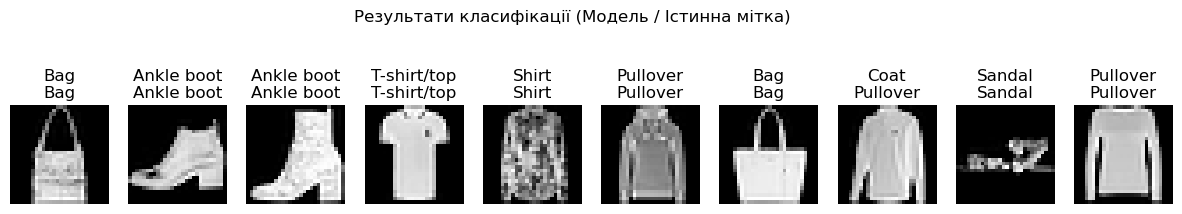

In [11]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

indices = np.random.choice(len(x_test), 10)
x_sample = x_test[indices]
y_sample = y_test[indices]
preds = model.predict(x_sample)
pred_labels = np.argmax(preds, axis=1)

plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_sample[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(f"{class_names[pred_labels[i]]}\n{class_names[y_sample[i]]}")
plt.suptitle("Результати класифікації (Модель / Істинна мітка)")
plt.show()
